# Day 2: A python class example
Date: 01/05/2022
Author: Lucy Hackett

Goal: Introduce OLS as a minimum-distance estimator. We will:
- write a very simple class example, explaining instantiation, methods, and scope
- show how to pull from random distributions
- create and plot x, y data


In [1]:
# for later
import numpy as np
from scipy.stats import distributions as iid
from scipy.stats import rv_continuous

## Introduction to python classes
python classes are objects that have attributes and methods. These objects are abstract in the sense that a class in the abstract is used to "instantiate" specific "instances" of the class. For example, here we will create a class called Student, and will create several instantiations of specific students.

To define a class, we use ``class ClassName:``, followed by indented lines (convention is to name classes with upper case).

Classes have 3 components:
* **The constructor** this is a method (think: function) that creates an _instance_ of the class. This component must be present in all classes, as it is the engine that creates the object. It looks like ``def __init__(self):``
* **Attributes** These are attributes that all instances of a class have. They can be anything, or not exist at all. For example, in a Student class, we might want student's to have attributes like a student ID, gender, age, etc. These can vary by instance of the Student class, but all instances of ``Student`` have one. If we imagine an alternative class called `Alien()`, attributes might include home planet and and number of limbs.
* **Methods** Methods are functions that belong to a class. They may return output or not. For example, we may want to write a method that calculates the student's GPA given a series of numeric grades.

The most simple class is made up of only a constructor, and the most simple constructor doesn't do anything except create an instance of the class. This looks like:

In [2]:
class Student:
    def __init__(self):
        # print something just to show the instance is created
        # we don't even need this; we could also just type:
        # pass
        print("I made a student!") 

In [3]:
# notice how the constructor method is executed when I call Student(),
# as evidenced by the fact that the print() inside the __init__ method runs
luisa = Student()

I made a student!


In [4]:
# Luisa is a Student
luisa

Now let's (re)make this class more interesting by adding attributes. Attributes can be passed into the instance of the object by defining the constructor as a function of the arguments we want to pass in. Let's pass in the following attributes:
* name (a ``string``)
* grades (a ``numpy array`` of numbers)
* age

We do this by defining these attributes with ``self.attribute =`` in the constructor function:

In [5]:
class Student:
    def __init__(self, name, grades, age):
        self.name = name
        self.grades = grades
        self.age = age

In [6]:
# create an instance of the class:
luisa = Student("Luisa", np.array([4.0, 3.5, 3.0]), 28)
armond = Student("Armand", np.array([3.0, 3.5, 3.0]), 23)
# we can access thse attributes using the .:
print(luisa.grades)
print(armond.grades)

[4.  3.5 3. ]
[3.  3.5 3. ]


Attributes can also be added as functions of input data, or set within methods. Let's add an indicator for the student being over 25 (for some reason we're interested in this):

In [7]:
class Student:
    def __init__(self, name, grades, age):
        self.name = name
        self.grades = grades
        self.age = age
        self.over25 = (age > 25)

In [8]:
# create an instance of the class:
luisa = Student("Luisa", np.array([4.0, 3.5, 3.0]), 28)
armond = Student("Armand", np.array([3.0, 3.5, 3.0]), 23)
# we can access thse attributes using the .:
print(luisa.over25)
print(armond.over25)

True
False


Finally, we add in methods. Methods (usually) go _outside the constructor environment_ (unindented), as they are not created when the instance is created but rather called later. Because these "belong" to the class just like attributes do, we call these methods using ``instanceName.methodName()`` similar to how attributes are also accessed using ``.``. Let's write two simple methods:
* A method that takes as an input a greeting phrase and prints ``_____, [instance name]!``.
* A method that returns the student's GPA

Note a couple things about the method below:
* class methods are defined with ``self`` as the first argument, but this argument is omitted when the method is called.
* Because ``self`` is passed to the methods, these have access to any methods and attributes that belong to the class.

In [9]:
class Student:
    def __init__(self, name, grades, age):
        self.name = name
        self.grades = grades
        self.age = age
        
    def greeting(self, phrase):
        print(phrase+', '+self.name+'!')
        
    def gpa(self):
        return(np.mean(self.grades))

In [10]:
luisa = Student("Luisa", np.array([4.0, 3.5, 3.0]), 28)

In [11]:
# call the greeting method
luisa.greeting("Ahoy")

Ahoy, Luisa!


In [12]:
# calculate Luisa's GPA:
gpa = luisa.gpa()
print(gpa)

3.5


Note that methods can also be called internally within the class, and can even be used to set attributes. Suppose we want to update a student's grades by adding a new set of grades to their list. We can write a method that does this as so:

In [13]:
class Student:
    def __init__(self, name, grades, age):
        self.name = name
        self.grades = grades
        self.age = age
        
    def greeting(self, phrase):
        print(phrase+', '+self.name+'!')
        
    def gpa(self):
        return(np.mean(self.grades))
    
    def updateGrades(self, grade):
        # append a new grade to self.grades
        self.grades = np.append(self.grades, grade)

In [14]:
jair = Student("Jair", np.array([3.0, 3.0, 3.0]), 35)
print(jair.grades)

jair.updateGrades(np.array([4.0, 4.0]))
print(jair.grades)

[3. 3. 3.]
[3. 3. 3. 4. 4.]


## Scope

Scope refers to where variable names "live" or how and when they are accessible. I like to think of scope as defining "Do I know what x is from here?". We saw some scope issues with regards to functions: variables defined in a function are "visible" or within the scope of the function, but are not visible to the global environment. Now classes give us another opportunity to talk about this important issue.

I took the following directly from a tutorial on [OOP in python](https://python-textbok.readthedocs.io/en/1.0/Variables_and_Scope.html), because I think it's perfectly stated:


_Class attributes [...] can be referenced by their bare names within the same scope, but they can also be accessed from outside this scope if we use the attribute access operator (.) on a class or an instance (an object which uses that class as its type). An attribute can also be set explicitly on an instance or class from inside a method. Attributes set on instances are called instance attributes. Class attributes are shared between all instances of a class, but each instance has its own separate instance attributes._

The above can be repeated word for word for class methods. Let's try it out:

In [15]:
jair.grades

try:
    print(grades)
except Exception as e: print(e)

name 'grades' is not defined


In [16]:
class Student:
    def __init__(self, name, grades, age):
        self.name = name
        self.grades = grades
        self.age = age
        
    def greeting(self, phrase):
        print(phrase+', '+self.name+'!')
        
    def gpa(self):
        return(np.mean(self.grades))
    
    def updateGrades(self, grade):
        self.grades = np.append(self.grades, grade)
        
    ## here I am going to cause problems!! 
    ## Can you tell why?    
    def printGrades(self):
        print(grades)
        
jimmy = Student("Jimmy", [2,2,3], 40)
try: 
    jimmy.printGrades()
except Exception as e: print(e)

name 'grades' is not defined


### Aside on Properties: A special kind of attribute
You will likely see the word "property" around when you look at classes in python packages. Properties are special kinds of attributes that are more controlled because they need to be set/modified via special functions, which allows you to protect the attribute. To get a sense of why you might want to protect attributes, consider the following set of manipulations of our student class:

In [17]:
print(luisa.name)
luisa.name = "Fred"
luisa.greeting("Hola")

Luisa
Hola, Fred!


This is probably not desireable; the name seems like a fundamental attribute of the instance that we might want to make a little more difficult to change to avoid accidents that cause unexpected behavior. This is where properties come in; as [this page](https://realpython.com/python-property/) explains, properties are "attributes that behave like methods", so they are not as manipulable as normal attributes. Specifically, properties have at least one of 3 methods: ``__get__, __set__, __delete__``. That's as far as I will go on them here; the main goal of this information is that you will not be confused when you read documentation that references properties.

## Python classes in the wild: Random numbers

Now that we have seen the basic functionality of python classes, you will notice that classes are **everywhere**. python is a multi-paradigm language, meaning it can be used to program functionally and/or used with OOP (objet-oriented programming, or basically based around classes). Many, many python packages are build around classes. 

A nearby example are random variable distributions from the ``scipy.stats`` module. These distributions are actually themselves instances of subclasses created from a class called ``rv_continuous`` (does your head hurt yet? Don't worry about what a subclass is yet- this comes from _inheritance_, which we are also not going to get into here). Let's take a look at one of these sub classes, ``scipy.stats.norm()`` whose documentation lives [here](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.norm.html).

In [18]:
# instantiate a normal distribution
# note that passing arguments into the instantiation here is not
# necessary; that is because there are default values for attributes
# such as the mean and variance (sufficient statistics for this dist.)
x = iid.norm()

In [19]:
# access an attribute: random state
# (used to generate random numbers)
x.random_state

RandomState(MT19937) at 0x125140940

In [20]:
# access a method: get the mean
x.mean()

0.0

In [21]:
# another method: generate random numbers using the rvs() method, which takes as an
# input the number of draws to make
x.rvs(5)

array([-0.70060549, -1.29397098, -0.01676995,  0.86765541,  0.23135823])

In [22]:
# note that we can create more instances with different attributes:
x5 = iid.norm(loc=5)
x5.mean()

5.0

## Exercise
Use ``scipy.stats`` distributions to generate 2 vectors ``v1`` and ``v2``. Try and read the documentation for the gamma distribution [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html) to make one of these vectors distributed $\Gamma(a)$ for some $a > 0$. The documentation for the normal distribution if you want to play with that is [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm).

Plot these against eachother.

In [23]:
# Step 1: instantiate


In [24]:
# Step 2: generate random numbers


Text(0, 0.5, 'Y')

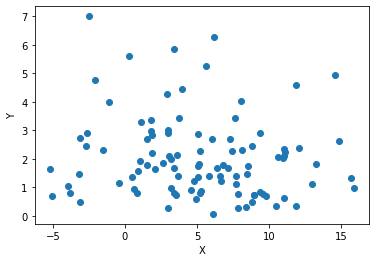

In [25]:
# extra: plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter()

ax.set_xlabel("X")
ax.set_ylabel("Y")

## Python classes in the wild: OLS

There are several canned python packages that calculate OLS with most any kind of standard errors, etc. you could want! Which package you use is up to you; here is a brief and not at all exhaustive list of some of the packages I am familiar with to varying degrees:
* ``statsmodels``: A flexible syntax for regressions that allows you to define inputs in an equation syntax like in R, or as a function of matrices. [Here](https://www.vincentgregoire.com/standard-errors-in-python/) is a great guide to doing different types of standard errors in OLS.
* [```fastreg```](https://github.com/iamlemec/fastreg): Good for high-dimentional fixed effects, basic clustering capability
* ``numpy.linalg.lstsq``: An extremeley fast method directly in numpy for doing the matrix algebra that solves OLS.

To focus on using and manipulating python classes, we will be using the statsmodels package. Before starting, we can look at the documentation [here](https://www.statsmodels.org/dev/generated/statsmodels.formula.api.ols.html#statsmodels.formula.api.ols). I want us to notice what the formula _returns_: "``model`` a model instance". This means that the function instantiates a ``Model`` class! Let's try it.

In [26]:
# for loading some data from the internet
from sklearn.datasets import fetch_california_housing
# for OLS
import statsmodels.formula.api as sm

In [27]:
# Load data (will download the data if it's the first time loading)
housing = fetch_california_housing(as_frame=True)
# Create a dataframe
df = housing['data'].join(housing['target'])

In [28]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Let's instantiate. Again, practicing reading documentation: The two input fields of ``sm.ols`` that do not have a default (i.e., that we have to pass) are a ``formula`` and ``data``.

In [29]:
reg = sm.ols("MedHouseVal ~ MedInc + Population + HouseAge + AveRooms",
             df)

In [30]:
# reg is an OLS class! 
reg

You can check out the [documentation](https://www.statsmodels.org/devel/dev/generated/statsmodels.base.model.Model.html#statsmodels.base.model.Model) of the ``Model`` class to see the methods and attributes of this class. The main method we want is ``fit()``, which actually fits OLS to the data we have given the class. This will return a new class, check this one out [here](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.html). I've summarized some of the key attributes and methods here:

Attributes/properties
- ``params``: estimated parameters
- ``df_resid``: degrees of freedome
- ``cov_type``: type of SE's used
- ``HC0_se``: White robust SEs
- ``fittedvalues``: predicted values ``X@b``
- ``rsquared_adj``: Adjusted $R^2$

... and many more!

Methods
- ``cov_params()``: calculate variance matrix; returns ``pd.DataFrame()``
- ``summary()``: Return summary of results
- ``t_test(r_matrix[, cov_p, use_t])``: conduct a t-test using the R matrix from Sofia's half

In [31]:
# instantiate the RegressionResultsWrapper class
reg_fitted = reg.fit()
reg_fitted

In [32]:
# Check out some attributes, methods
print(reg_fitted.rsquared_adj)
reg_fitted.cov_params()

0.5125450931389952


,Intercept,MedInc,Population,HouseAge,AveRooms
Intercept,6.565416e-04,-2.772584e-05,-6.889401e-08,-8.930335e-06,-3.017282e-05
MedInc,-2.772584e-05,9.810171e-06,-1.236640e-10,1.010278e-07,-2.387772e-06
Population,-6.889401e-08,-1.236640e-10,2.730805e-11,7.719818e-10,1.535553e-09
HouseAge,-8.930335e-06,1.010278e-07,7.719818e-10,2.262686e-07,1.765759e-07
AveRooms,-3.017282e-05,-2.387772e-06,1.535553e-09,1.765759e-07,5.925430e-06


In [33]:
reg_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     5426.
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        08:59:12   Log-Likelihood:                -24824.
No. Observations:               20640   AIC:                         4.966e+04
Df Residuals:                   20635   BIC:                         4.970e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0425      0.026     -1.659      0.097      -0.093       0.008
MedInc         0.4427      0.003    141.326      0.000       0.437       0.449
Population  2.493e-05   5.23e-06      4.771      0.000    1.47e-05    3.52e-05
HouseAge       0.0175      0.000     36.846      0.000       0.017       0.018
AveRooms      -0.0258      0.002    -10.579      0.000      -0.031      -0.021
==============================================================================
Omnibus:                     4429.223   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11666.143
Skew:                           1.160   Prob(JB):                         0.00
Kurtosis:                       5.860   Cond. No.                     8.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""